In [1]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tanvipenumudy","key":"58b4741e8ef26786b8e291a6621da313"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d tongpython/cat-and-dog

 96% 209M/218M [00:06<00:00, 31.6MB/s]
100% 218M/218M [00:06<00:00, 33.7MB/s]


In [5]:
!ls

cat-and-dog.zip  kaggle.json  sample_data


In [6]:
!unzip "cat-and-dog.zip" -d /tmp

Streaming output truncated to the last 5000 lines.
  inflating: /tmp/training_set/training_set/cats/cat.3705.jpg  
  inflating: /tmp/training_set/training_set/cats/cat.3706.jpg  
  inflating: /tmp/training_set/training_set/cats/cat.3707.jpg  
  inflating: /tmp/training_set/training_set/cats/cat.3708.jpg  
  inflating: /tmp/training_set/training_set/cats/cat.3709.jpg  
  inflating: /tmp/training_set/training_set/cats/cat.371.jpg  
  inflating: /tmp/training_set/training_set/cats/cat.3710.jpg  
  inflating: /tmp/training_set/training_set/cats/cat.3711.jpg  
  inflating: /tmp/training_set/training_set/cats/cat.3712.jpg  
  inflating: /tmp/training_set/training_set/cats/cat.3713.jpg  
  inflating: /tmp/training_set/training_set/cats/cat.3714.jpg  
  inflating: /tmp/training_set/training_set/cats/cat.3715.jpg  
  inflating: /tmp/training_set/training_set/cats/cat.3716.jpg  
  inflating: /tmp/training_set/training_set/cats/cat.3717.jpg  
  inflating: /tmp/training_set/training_set/cats/cat.3

In [7]:
import os
print(len(os.listdir('/tmp')))
print(len(os.listdir('/tmp/training_set/training_set/dogs')))
print(len(os.listdir('/tmp/training_set/training_set/cats')))
print(len(os.listdir('/tmp/test_set/test_set/dogs')))
print(len(os.listdir('/tmp/test_set/test_set/cats')))

2
4006
4001
1013
1012


In [28]:
import cv2
for i in range(1,11):
  im = cv2.imread('/tmp/training_set/training_set/cats/cat.'+str(i)+'.jpg')
  print(im.shape)

(280, 300, 3)
(396, 312, 3)
(414, 500, 3)
(375, 499, 3)
(144, 175, 3)
(303, 400, 3)
(499, 495, 3)
(345, 461, 3)
(425, 320, 3)
(499, 489, 3)


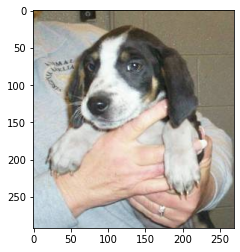

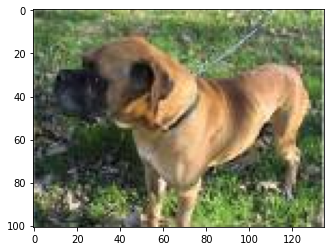

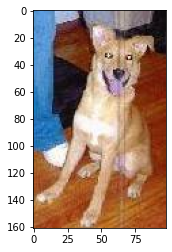

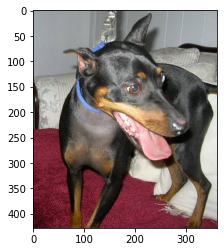

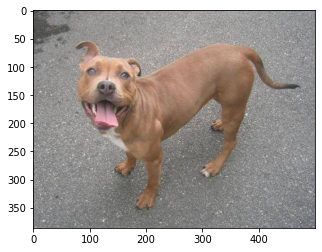

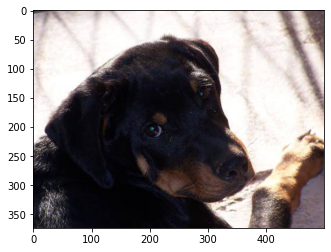

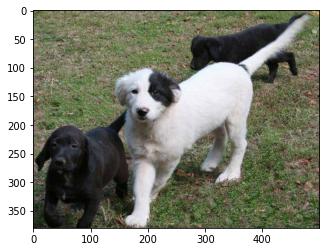

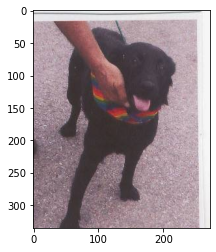

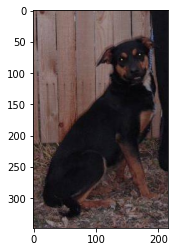

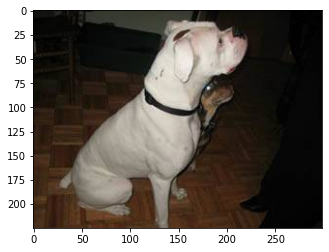

In [29]:
import cv2
import glob
from matplotlib import image
import matplotlib.pyplot as plt
ImgList=[file for file in glob.glob('/tmp/training_set/training_set/dogs/*.jpg')]
ImgList[10:20]
for i in ImgList:
    G=cv2.cvtColor(cv2.imread(i),cv2.COLOR_BGR2RGB)
    plt.imshow(G)
    plt.show()

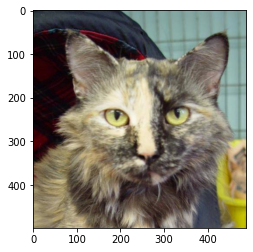

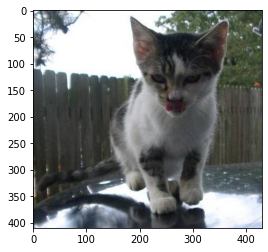

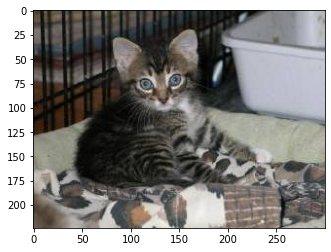

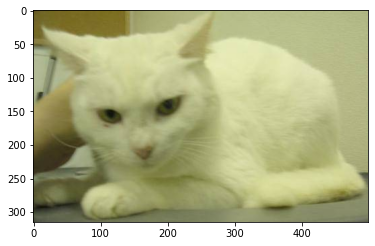

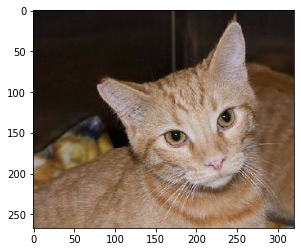

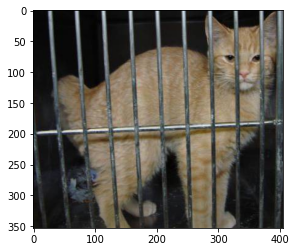

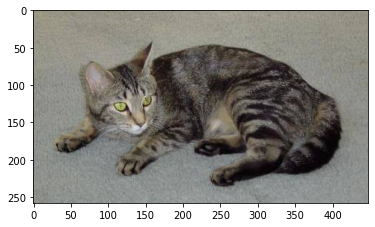

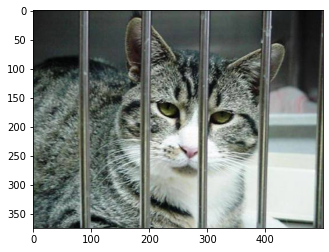

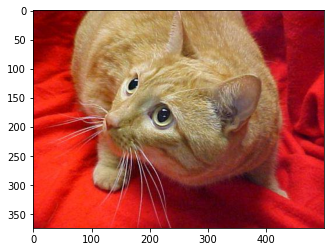

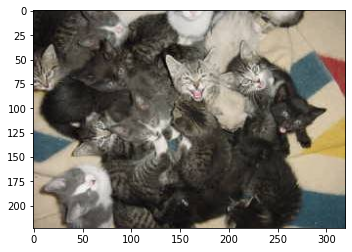

In [30]:
ImgList2=[file for file in glob.glob('/tmp/training_set/training_set/cats/*.jpg')]
ImgList2[10:20]
for i in ImgList2:
    G=cv2.cvtColor(cv2.imread(i),cv2.COLOR_BGR2RGB)
    plt.imshow(G)
    plt.show()

In [31]:
import glob
I=[image.imread(file) for file in glob.glob('/tmp/training_set/training_set/dogs/dog.88.jpg')]
I

[array([[[ 64,  94,  70],
         [ 68,  98,  74],
         [ 69,  99,  75],
         ...,
         [101, 133,  86],
         [100, 132,  85],
         [100, 132,  85]],
 
        [[ 69, 101,  60],
         [ 71, 103,  62],
         [ 66,  98,  57],
         ...,
         [ 79, 110,  66],
         [ 78, 109,  65],
         [ 77, 108,  64]],
 
        [[ 97, 132,  66],
         [ 98, 133,  67],
         [ 88, 123,  57],
         ...,
         [ 67,  98,  57],
         [ 67,  98,  57],
         [ 66,  97,  56]],
 
        ...,
 
        [[ 55,  76,  43],
         [ 56,  77,  44],
         [ 56,  77,  44],
         ...,
         [ 23,  39,  29],
         [ 25,  41,  31],
         [ 21,  37,  27]],
 
        [[ 62,  84,  46],
         [ 61,  83,  47],
         [ 57,  79,  43],
         ...,
         [ 20,  36,  26],
         [ 20,  36,  26],
         [ 15,  31,  21]],
 
        [[ 55,  77,  38],
         [ 53,  75,  37],
         [ 47,  69,  31],
         ...,
         [ 21,  37,  27],
  

In [32]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])

In [33]:
TRAINING_DIR = '/tmp/training_set/training_set/'
train_datagen = ImageDataGenerator(rescale=1./255.)

train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(150,150),
    batch_size=100,
    class_mode='binary')

VALIDATION_DIR = '/tmp/test_set/test_set/'
validation_datagen = ImageDataGenerator(rescale=1./255.)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(150,150),
    batch_size=100,
    class_mode='binary') 

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [34]:
history = model.fit_generator(train_generator,
                              epochs=20,
                              verbose=1,
                              validation_data=validation_generator)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
81/81 [==============================] - 30s 372ms/step - loss: 8.3865 - acc: 0.4967 - val_loss: 8.8075 - val_acc: 0.5012
Epoch 2/20
81/81 [==============================] - 30s 366ms/step - loss: 7.2578 - acc: 0.5033 - val_loss: 7.8659 - val_acc: 0.4998
Epoch 3/20
81/81 [==============================] - 30s 366ms/step - loss: 7.0370 - acc: 0.5106 - val_loss: 5.0198 - val_acc: 0.5096
Epoch 4/20
81/81 [==============================] - 30s 368ms/step - loss: 6.9618 - acc: 0.5099 - val_loss: 5.4465 - val_acc: 0.5319
Epoch 5/20
81/81 [==============================] - 30s 366ms/step - loss: 6.8423 - acc: 0.5230 - val_loss: 5.4088 - val_acc: 0.5255
Epoch 6/20
81/81 [==============================] - 30s 365ms/step - loss: 7.0277 - acc: 0.5104 - val_loss: 8.4966 - val_acc: 0.5082
Epoch 7/20
81/81 [==============================] - 29s 363ms/step - loss: 6.9138 - acc: 0.5192 - val_loss: 7.4538 - val_acc: 

Text(0.5, 1.0, 'Training and validation loss')

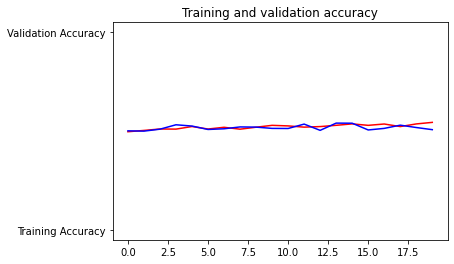

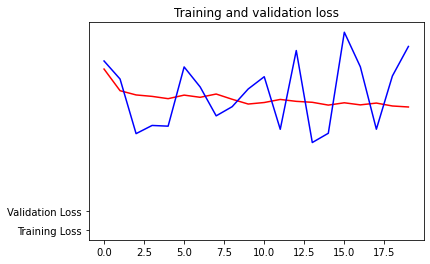

In [35]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) 

plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")

plt.title('Training and validation loss')

In [36]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150,150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")

Saving cat.35.jpg to cat.35.jpg
Saving cat.38.jpg to cat.38.jpg
[0.]
cat.35.jpg is a cat
[0.]
cat.38.jpg is a cat
